In [1]:
url = 'https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and'

In [2]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Only using data from one large shelter so that adoption policies and strategies are the same 
austin_raw_data = pd.read_csv('raw_data/aac_intakes_outcomes.csv')

# 1. Selecting columns and dogs as animal type

In [4]:
austin_raw_data.columns


Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

In [5]:
#how many animal types are included?
austin_raw_data['animal_type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird'], dtype=object)

In [6]:
#only select dogs
austin_data = austin_raw_data[austin_raw_data['animal_type'] == 'Dog']
austin_data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [7]:
#drop redundant, irrelevant or columns missing many values 
new_columns = ['outcome_type', 'animal_id_intake',
        'age_upon_outcome_(years)',
       'outcome_datetime',
       'outcome_monthyear',  'animal_type', 'breed', 'color',
       'intake_condition', 'intake_type', 'sex_upon_outcome',
       'age_upon_intake_(years)',
        'intake_datetime', 
        'intake_monthyear', 
       'intake_number', 'time_in_shelter_days'] 

In [8]:

austin_data = austin_data.loc[:, new_columns]
austin_data.head()


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days
0,Return to Owner,A006100,10.0,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10.0,2017-12-07 00:00:00,2017-12,1.0,0.588194
1,Return to Owner,A006100,7.0,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7.0,2014-12-19 10:21:00,2014-12,2.0,1.259722
2,Return to Owner,A006100,6.0,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6.0,2014-03-07 14:26:00,2014-03,3.0,1.113889
3,Transfer,A047759,10.0,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10.0,2014-04-02 15:55:00,2014-04,1.0,4.970139
4,Return to Owner,A134067,16.0,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16.0,2013-11-16 09:02:00,2013-11,1.0,0.119444


In [9]:
austin_data.shape

(45366, 16)

# 2. Viewing and changing data types

In [10]:
austin_data.dtypes

outcome_type                 object
animal_id_intake             object
age_upon_outcome_(years)    float64
outcome_datetime             object
outcome_monthyear            object
animal_type                  object
breed                        object
color                        object
intake_condition             object
intake_type                  object
sex_upon_outcome             object
age_upon_intake_(years)     float64
intake_datetime              object
intake_monthyear             object
intake_number               float64
time_in_shelter_days        float64
dtype: object

In [11]:
#convert intake and outcome dates to datetime objects 
#time of year may play into number of adoptions
austin_data[['outcome_datetime', 'intake_datetime']] = austin_data[['outcome_datetime', 'intake_datetime']].apply(pd.to_datetime, format = '%Y/%m/%d', errors = 'coerce')
austin_data.dtypes

outcome_type                        object
animal_id_intake                    object
age_upon_outcome_(years)           float64
outcome_datetime            datetime64[ns]
outcome_monthyear                   object
animal_type                         object
breed                               object
color                               object
intake_condition                    object
intake_type                         object
sex_upon_outcome                    object
age_upon_intake_(years)            float64
intake_datetime             datetime64[ns]
intake_monthyear                    object
intake_number                      float64
time_in_shelter_days               float64
dtype: object

# 3. Exploring 

In [12]:
austin_data['outcome_type'].unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan], dtype=object)

In [13]:
austin_data.outcome_type.loc[austin_data['outcome_type']== 'Return to Owner'].count()

13273

In [14]:
#a lot of unique breeds, maybe we can combine them, asssuming the breed listed first is the most apparent 
austin_data['breed'].nunique()

1919

In [15]:
#the majority are followed by 'mix' 
austin_data.groupby('breed')['animal_id_intake'].nunique()[40:60]

breed
American Bulldog/Boxer                    4
American Bulldog/Chinese Sharpei          1
American Bulldog/Dalmatian                1
American Bulldog/English Bulldog          1
American Bulldog/Great Pyrenees           1
American Bulldog/Labrador Retriever       3
American Bulldog/Mastiff                  3
American Bulldog/Pit Bull                13
American Bulldog/Pointer                  2
American Eskimo                           7
American Eskimo Mix                      20
American Eskimo/Alaskan Husky             1
American Eskimo/Australian Shepherd       1
American Eskimo/Border Collie             2
American Foxhound                         1
American Foxhound Mix                    11
American Foxhound/Labrador Retriever      1
American Foxhound/Pointer                 1
American Pit Bull Terrier                 8
American Pit Bull Terrier Mix           135
Name: animal_id_intake, dtype: int64

In [16]:
#taking only the first breed listed 
austin_data['breed'] = austin_data['breed'].astype(str)
austin_data['new_breed'] = austin_data['breed'].str.split("/").str[0]
austin_data['new_breed'] = austin_data['new_breed'].str.replace(' Mix', '')
austin_data['new_breed'].nunique()

197

In [17]:
austin_data.groupby('new_breed')['animal_id_intake'].nunique().sort_values(ascending=False).head(20)

new_breed
Pit Bull                 5467
Labrador Retriever       5374
Chihuahua Shorthair      5203
German Shepherd          2193
Australian Cattle Dog    1255
Dachshund                1142
Boxer                     793
Border Collie             787
Miniature Poodle          740
Yorkshire Terrier         583
Australian Shepherd       559
Jack Russell Terrier      556
Beagle                    541
Catahoula                 530
Miniature Schnauzer       526
Rat Terrier               522
Siberian Husky            518
Great Pyrenees            452
Shih Tzu                  436
Rottweiler                414
Name: animal_id_intake, dtype: int64

In [18]:
#Color needs to be grouped to reduced amount of unique values
austin_data.groupby('color')['animal_id_intake'].nunique().sort_values(ascending=False).head(20)

color
Black/White            4398
Black                  2208
White                  2074
Tan/White              2073
Brown/White            2064
Tan                    1759
Tricolor               1718
Brown                  1631
Black/Tan              1588
White/Black            1328
White/Brown            1286
Black/Brown            1274
Brown Brindle/White    1103
Blue/White             1050
White/Tan               995
Brown/Black             912
Red                     794
Red/White               731
Brown Brindle           636
Tan/Black               533
Name: animal_id_intake, dtype: int64

In [19]:
#taking only the first color listed assuming that is the primary color
austin_data['color'] = austin_data['color'].astype(str)
austin_data['new_color'] = austin_data['color'].str.split("/").str[0]
#austin_data['new_breed'] = austin_data['new_breed'].str.replace(' Mix', '')
print(austin_data['new_color'].nunique(), austin_data['color'].nunique())

36 337


In [20]:
austin_data.count()

outcome_type                45364
animal_id_intake            45366
age_upon_outcome_(years)    45366
outcome_datetime            45366
outcome_monthyear           45366
animal_type                 45366
breed                       45366
color                       45366
intake_condition            45366
intake_type                 45366
sex_upon_outcome            45365
age_upon_intake_(years)     45366
intake_datetime             45366
intake_monthyear            45366
intake_number               45366
time_in_shelter_days        45366
new_breed                   45366
new_color                   45366
dtype: int64

In [21]:
print(austin_data['time_in_shelter_days'].sort_values(ascending =False).head(20))
print(austin_data['time_in_shelter_days'].median())

5500     1606.194444
12123    1411.147917
18263    1268.975000
17795    1268.872917
2701     1255.047222
4107     1206.846528
26369    1157.941667
30232    1053.720139
27862    1041.110417
31408    1009.966667
12462     997.879861
20345     938.098611
1838      903.972917
34538     903.828472
29964     880.740972
8958      856.261806
5221      836.159028
40215     823.199306
6790      806.995833
45383     794.043750
Name: time_in_shelter_days, dtype: float64
5.064583333333333


# 4. Null values

In [22]:
#finding null values
austin_data.columns[austin_data.isna().any()]

Index(['outcome_type', 'sex_upon_outcome'], dtype='object')

In [23]:
#dropping these becasue without the outcome the dog information is not much use 
austin_data[austin_data['outcome_type'].isna()]

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color
44097,NaN,A718046,10.000000,2016-03-26 14:22:00,2016-03,Dog,Chihuahua Longhair Mix,Cream,Normal,Public Assist,Neutered Male,10.000000,2016-03-26 00:00:00,2016-03,1.0,0.598611,Chihuahua Longhair,Cream
59034,NaN,A737930,0.821918,2016-11-17 10:59:00,2016-11,Dog,Pit Bull Mix,Fawn/White,Normal,Public Assist,Intact Male,0.821918,2016-11-09 15:01:00,2016-11,2.0,7.831944,Pit Bull,Fawn


In [24]:
#dropping this beacuse its only one and is an owner surrender and then returned to owner
austin_data[austin_data['sex_upon_outcome'].isna()]

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color
6523,Return to Owner,A667395,7.0,2013-11-27 16:11:00,2013-11,Dog,Dachshund,Brown Merle,Normal,Owner Surrender,NaN,7.0,2013-11-17 13:15:00,2013-11,1.0,10.122222,Dachshund,Brown Merle


In [25]:
#new dataframe with dropped columns and no null values
df = austin_data[austin_data[['outcome_type', 'sex_upon_outcome']].notnull().all(1)]
df.head()

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color
0,Return to Owner,A006100,10.0,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10.0,2017-12-07 00:00:00,2017-12,1.0,0.588194,Spinone Italiano,Yellow
1,Return to Owner,A006100,7.0,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7.0,2014-12-19 10:21:00,2014-12,2.0,1.259722,Spinone Italiano,Yellow
2,Return to Owner,A006100,6.0,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6.0,2014-03-07 14:26:00,2014-03,3.0,1.113889,Spinone Italiano,Yellow
3,Transfer,A047759,10.0,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10.0,2014-04-02 15:55:00,2014-04,1.0,4.970139,Dachshund,Tricolor
4,Return to Owner,A134067,16.0,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16.0,2013-11-16 09:02:00,2013-11,1.0,0.119444,Shetland Sheepdog,Brown


# 5. Convert str variables to int

In [26]:
#create function to form dictonary to create int variables
def create_dict(items):
        return {v: i for i, v in enumerate(items, 0)}

In [27]:
#create variable to apply function to
condition = df['intake_condition'].unique().tolist()

In [28]:
#make dict
create_dict(condition)

{'Normal': 0,
 'Injured': 1,
 'Aged': 2,
 'Sick': 3,
 'Other': 4,
 'Pregnant': 5,
 'Nursing': 6,
 'Feral': 7}

In [29]:
#map to new column
df['intake_cond_int']=df['intake_condition'].map(create_dict(condition))
df.head()

<ipython-input-29-ab6c0b329468>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intake_cond_int']=df['intake_condition'].map(create_dict(condition))


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color,intake_cond_int
0,Return to Owner,A006100,10.0,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10.0,2017-12-07 00:00:00,2017-12,1.0,0.588194,Spinone Italiano,Yellow,0
1,Return to Owner,A006100,7.0,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7.0,2014-12-19 10:21:00,2014-12,2.0,1.259722,Spinone Italiano,Yellow,0
2,Return to Owner,A006100,6.0,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6.0,2014-03-07 14:26:00,2014-03,3.0,1.113889,Spinone Italiano,Yellow,0
3,Transfer,A047759,10.0,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10.0,2014-04-02 15:55:00,2014-04,1.0,4.970139,Dachshund,Tricolor,0
4,Return to Owner,A134067,16.0,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16.0,2013-11-16 09:02:00,2013-11,1.0,0.119444,Shetland Sheepdog,Brown,1


In [30]:
intake_type = df['intake_type'].unique().tolist()
create_dict(intake_type)
df['intake_type_int']=df['intake_type'].map(create_dict(intake_type))
df.head()

<ipython-input-30-1399fff20ba9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intake_type_int']=df['intake_type'].map(create_dict(intake_type))


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int
0,Return to Owner,A006100,10.0,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10.0,2017-12-07 00:00:00,2017-12,1.0,0.588194,Spinone Italiano,Yellow,0,0
1,Return to Owner,A006100,7.0,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7.0,2014-12-19 10:21:00,2014-12,2.0,1.259722,Spinone Italiano,Yellow,0,1
2,Return to Owner,A006100,6.0,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6.0,2014-03-07 14:26:00,2014-03,3.0,1.113889,Spinone Italiano,Yellow,0,1
3,Transfer,A047759,10.0,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10.0,2014-04-02 15:55:00,2014-04,1.0,4.970139,Dachshund,Tricolor,0,2
4,Return to Owner,A134067,16.0,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16.0,2013-11-16 09:02:00,2013-11,1.0,0.119444,Shetland Sheepdog,Brown,1,1


In [31]:
df['sex_upon_outcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Female', 'Intact Male',
       'Unknown'], dtype=object)

In [32]:
sex_upon_outcome = df['sex_upon_outcome'].unique().tolist()
create_dict(sex_upon_outcome)
df['sex_upon_outcome_int']=df['sex_upon_outcome'].map(create_dict(sex_upon_outcome))
df.head()

<ipython-input-32-c17472e67a89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex_upon_outcome_int']=df['sex_upon_outcome'].map(create_dict(sex_upon_outcome))


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,...,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int,sex_upon_outcome_int
0,Return to Owner,A006100,10.0,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,...,10.0,2017-12-07 00:00:00,2017-12,1.0,0.588194,Spinone Italiano,Yellow,0,0,0
1,Return to Owner,A006100,7.0,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,...,7.0,2014-12-19 10:21:00,2014-12,2.0,1.259722,Spinone Italiano,Yellow,0,1,0
2,Return to Owner,A006100,6.0,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,...,6.0,2014-03-07 14:26:00,2014-03,3.0,1.113889,Spinone Italiano,Yellow,0,1,0
3,Transfer,A047759,10.0,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,...,10.0,2014-04-02 15:55:00,2014-04,1.0,4.970139,Dachshund,Tricolor,0,2,0
4,Return to Owner,A134067,16.0,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,...,16.0,2013-11-16 09:02:00,2013-11,1.0,0.119444,Shetland Sheepdog,Brown,1,1,0


In [33]:
#new column with outcome type as int (0-7) (the hard way)
outcomes = {'Return to Owner':0, 'Transfer':1,'Adoption':2, 'Euthanasia':3, 'Died':4, 'Rto-Adopt':5, 'Missing':6, 'Disposal':7}
df['outcome_type_int'] = df['outcome_type'].map(outcomes)
df.head()

<ipython-input-33-d86445a09f53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outcome_type_int'] = df['outcome_type'].map(outcomes)


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,...,intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int,sex_upon_outcome_int,outcome_type_int
0,Return to Owner,A006100,10.0,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,...,2017-12-07 00:00:00,2017-12,1.0,0.588194,Spinone Italiano,Yellow,0,0,0,0
1,Return to Owner,A006100,7.0,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,...,2014-12-19 10:21:00,2014-12,2.0,1.259722,Spinone Italiano,Yellow,0,1,0,0
2,Return to Owner,A006100,6.0,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,...,2014-03-07 14:26:00,2014-03,3.0,1.113889,Spinone Italiano,Yellow,0,1,0,0
3,Transfer,A047759,10.0,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,...,2014-04-02 15:55:00,2014-04,1.0,4.970139,Dachshund,Tricolor,0,2,0,1
4,Return to Owner,A134067,16.0,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,...,2013-11-16 09:02:00,2013-11,1.0,0.119444,Shetland Sheepdog,Brown,1,1,0,0


Dropping data to decrease noise

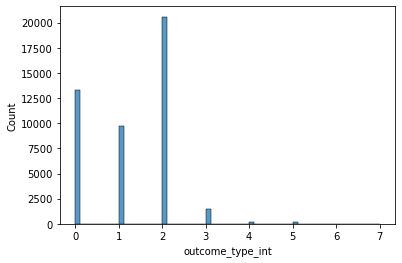

<Figure size 576x288 with 0 Axes>

In [34]:
_ = sns.histplot( x=  df['outcome_type_int'])
plt.figure(figsize=(8, 4))
plt.show()
#what to do about transfered animals? Do they count as unadopted since it's a no kill shelter? 
#Dropping 3-7 to capture a better image of the data and because outcomes 3-7 are in unusal situations and not very common

In [35]:
df.shape

(45363, 22)

In [36]:
# dropping outcome types 3-7 (Euthanasia, Died, RTO-Adopt, Missing, Disposal)
df = df[df['outcome_type_int']<= 2]
df['outcome_type'].unique()

array(['Return to Owner', 'Transfer', 'Adoption'], dtype=object)

In [37]:
#Also dropping return to owner, because these dogs were likely never eligable for adoption. 
df = df[df['outcome_type_int']!= 0]
df['outcome_type'].unique()

array(['Transfer', 'Adoption'], dtype=object)

A different project focused on finding out why the shelter gets so many dogs that are returned to their owner may help keep these dogs home and reduce the amount of dogs the shelter is caring for at any one time

In [56]:
#animal IDs have duplicates.. are they the same dog or is this a mistake?
duplicates = df[df['animal_id_intake'].duplicated(keep=False)==True]
duplicates.head() #they are the same dog


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,...,intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int,sex_upon_outcome_int,outcome_type_int
204,Adoption,A378348,9.0,2014-04-23 07:43:00,2014-04,Dog,German Shepherd Mix,Black/Brown,Normal,Owner Surrender,...,2014-01-25 14:38:00,2014-01,1.0,87.711806,German Shepherd,Black,0,2,0,2
205,Adoption,A378348,9.0,2014-01-19 13:39:00,2014-01,Dog,German Shepherd Mix,Black/Brown,Normal,Owner Surrender,...,2013-12-12 11:07:00,2013-12,2.0,38.105556,German Shepherd,Black,0,2,0,2
231,Adoption,A390222,9.0,2013-12-15 17:10:00,2013-12,Dog,Jack Russell Terrier,White/Tan,Normal,Owner Surrender,...,2013-12-08 17:04:00,2013-12,1.0,7.004167,Jack Russell Terrier,White,0,2,1,2
232,Adoption,A390222,9.0,2013-12-08 15:16:00,2013-12,Dog,Jack Russell Terrier,White/Tan,Normal,Owner Surrender,...,2013-12-04 18:24:00,2013-12,2.0,3.869444,Jack Russell Terrier,White,0,2,1,2
319,Adoption,A438287,14.0,2018-01-13 17:54:00,2018-01,Dog,Chihuahua Shorthair Mix,Tan,Normal,Owner Surrender,...,2018-01-08 12:03:00,2018-01,1.0,5.243750,Chihuahua Shorthair,Tan,0,2,1,2


In [50]:
df.count()

outcome_type                30278
animal_id_intake            30278
age_upon_outcome_(years)    30278
outcome_datetime            30278
outcome_monthyear           30278
animal_type                 30278
breed                       30278
color                       30278
intake_condition            30278
intake_type                 30278
sex_upon_outcome            30278
age_upon_intake_(years)     30278
intake_datetime             30278
intake_monthyear            30278
intake_number               30278
time_in_shelter_days        30278
new_breed                   30278
new_color                   30278
intake_cond_int             30278
intake_type_int             30278
sex_upon_outcome_int        30278
outcome_type_int            30278
dtype: int64

In [39]:
df['animal_id_intake'].nunique()

27297

In [72]:
df.groupby('new_color')['animal_id_intake'].nunique().sort_values(ascending=False).tail(36)
#dogs_per_color = df.groupby('new_color')['animal_id_intake'].sum().sort_values()
#dogs_per_color
df.['new_color'].duplicated()

new_color
Black             7170
White             4764
Brown             3406
Tan               3332
Tricolor          1318
Brown Brindle     1267
Red               1194
Blue               901
Chocolate          697
Sable              519
Cream              413
Buff               352
Yellow             318
Fawn               313
Gray               282
Blue Merle         230
Black Brindle      165
Brown Merle        120
Gold                96
Blue Tick           93
Red Tick            76
Red Merle           61
Silver              53
Apricot             48
Yellow Brindle      47
Liver               18
Blue Tiger          17
Black Smoke          8
Brown Tiger          6
Liver Tick           4
Orange               3
Blue Cream           2
Blue Smoke           1
Black Tiger          1
Ruddy                1
Agouti               1
Name: animal_id_intake, dtype: int64

In [41]:
# drop colors that only have 10% of all the dogs in the data set


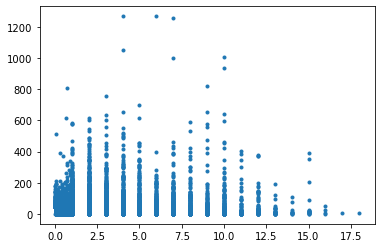

In [42]:
a = df[df['outcome_type'] == 'Adoption']['age_upon_intake_(years)']
data = df[df['outcome_type'] == 'Adoption'] ['time_in_shelter_days']
plt.plot(a, data, marker = '.', linestyle='none')
plt.show()

In [44]:
df.to_csv('wrangled_data')